# 爬蟲_博客來暢銷排行榜

### 因為執行LLM的關係，1~4是在colab上進行的，5是在本機上進行。
### Colab : https://colab.research.google.com/drive/1inBYSmgkPxfzVCN2bTuINKuYJzkzs9Ni?usp=sharing

## 1. 使用模組BookTopSalesCrawler內的function爬取外文書近7天銷售排行榜的資料

In [1]:
import BookTopSalesCrawler as bc
crawler = bc.BookTopSalesCrawler()
crawler.fetch_pages('外文','7') #輸入要抓取的語言種類與天數
df = crawler.to_dataframe()
df

,title,author,price,link,intro
0,迷你桌上型空氣喇叭Mini Air Horn: Get Hype!,"Riordan, Conor",299,https://www.books.com.tw/products/F018494970?l...,「叭──」經典的造型，以及經典到不行的音效，無論是炒熱派對氣氛、打斷同事的鬼打牆、為朋友的冷...
1,迷你桌上型告解室Desktop Confessional,"Menner, Jackson",359,https://www.books.com.tw/products/F017210518?l...,會議當中忍不住對胡扯的大老闆翻白眼；和討人厭客戶握手時，忽然控制不住手勁；目睹豬隊友同事經過...
2,滑滑軌道書機關書Bizzy Bear: Find and Follow On the Far...,Benji Davies,220,https://www.books.com.tw/products/F01a447871?l...,★英國超人氣忙碌小熊Bizzy Bear全新滑滑軌道系列★附故事音檔、四條滑滑軌道，讓小小孩...
3,苦海小提琴Tiny Violin: Soundtrack for Your Sob Story,"Royal, Sarah",359,https://www.books.com.tw/products/F019188560?l...,室友第八百次對你抱怨他的另一半，而勸離的話，你已經說到不想再說；同事對你抱怨他僅僅加薪5%，...
4,Rain Before Rainbows,"Smriti Halls,David Litchfield (ILT)",299,https://www.books.com.tw/products/F017526508?l...,在最黑暗的地方，找到前進的勇氣 雨後的彩虹、烏雲後的陽光、和小女孩和小狐狸一起，讓我們踏上旅...
...,...,...,...,...,...
95,One Day,"Nicholls, David",499,https://www.books.com.tw/products/F011881450?l...,NOW A NETFLIX SERIES - NEW YORK TIMES BESTSELL...
96,A Long Walk to Water,"Park, Linda Sue",277,https://www.books.com.tw/products/F012504615?l...,"★ 紐約時報、亞馬遜暢銷書榜少年小說第一名！★ 全美熱銷突破1,000,000萬冊，話題效應..."
97,I Am Rosa Parks,"Meltzer, Brad/ Eliopoulos, Christopher (ILT)",646,https://www.books.com.tw/products/F013160616?l...,Civil Rights leader Rosa Parks is the 3rd hero...
98,寶寶咬咬書：寶貝晚安（耐撕咬、無毒可洗）Indestructibles: Baby Nigh...,"Indestructibles, Inc. (COR)/ Merritt, Kate (ILT)",166,https://www.books.com.tw/products/F013249391?l...,Snuggle up at bedtime with a book that''s inde...


## 2. 使用Jieba提取關鍵字、繪製關聯圖

In [2]:
import jieba
import jieba.analyse

In [3]:
def extract_keywords(text):
    return jieba.analyse.extract_tags(text, topK=10) #提取前十個關鍵字

#創建一個新欄位keywords存放intro資料使用extract_keywords這個functionc後的結果
df['keywords'] = df['intro'].apply(extract_keywords)
df.head(10)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 1.841 seconds.
DEBUG:jieba:Loading model cost 1.841 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,title,author,price,link,intro,keywords
0,迷你桌上型空氣喇叭Mini Air Horn: Get Hype!,"Riordan, Conor",299,https://www.books.com.tw/products/F018494970?l...,「叭──」經典的造型，以及經典到不行的音效，無論是炒熱派對氣氛、打斷同事的鬼打牆、為朋友的冷...,"[horn, Air, air, 經典, 小物, Bwah, party, Want, mi..."
1,迷你桌上型告解室Desktop Confessional,"Menner, Jackson",359,https://www.books.com.tw/products/F017210518?l...,會議當中忍不住對胡扯的大老闆翻白眼；和討人厭客戶握手時，忽然控制不住手勁；目睹豬隊友同事經過...,"[forgiven, your, 抱歉, 有點, 告解室, kneeler, 不夠, lig..."
2,滑滑軌道書機關書Bizzy Bear: Find and Follow On the Far...,Benji Davies,220,https://www.books.com.tw/products/F01a447871?l...,★英國超人氣忙碌小熊Bizzy Bear全新滑滑軌道系列★附故事音檔、四條滑滑軌道，讓小小孩...,"[Bizzy, Bear, 軌道, farm, 忙碌, 英國, 音檔, 四條, 簡單, book]"
3,苦海小提琴Tiny Violin: Soundtrack for Your Sob Story,"Royal, Sarah",359,https://www.books.com.tw/products/F019188560?l...,室友第八百次對你抱怨他的另一半，而勸離的話，你已經說到不想再說；同事對你抱怨他僅僅加薪5%，...,"[mini, 小提琴, 琴弓, 這把, 音樂, replica, Includes, vio..."
4,Rain Before Rainbows,"Smriti Halls,David Litchfield (ILT)",299,https://www.books.com.tw/products/F017526508?l...,在最黑暗的地方，找到前進的勇氣 雨後的彩虹、烏雲後的陽光、和小女孩和小狐狸一起，讓我們踏上旅...,"[勇氣, 困難, 時刻, book, through, hope, light, way, ..."
5,I Love You Already!,"Jory John,Benji Davies (ILT)",299,https://www.books.com.tw/products/F014305963?l...,★美國亞馬遜網路書店讀者五顆星推薦 活力滿滿、不甘寂寞的鴨子vs. 只想好好靜一靜的無奈大熊...,"[Bear, 大熊, 鴨子, Duck, him, 時光, love, back, adve..."
6,劍橋活用英語文法套書：初級&中級 (Bilingual Edition),Murphy,624,https://www.books.com.tw/products/F013277793?l...,【暢銷in Use雙語文法套書: 初級&中級】本書的每一單元都由跨版面的兩頁組成，左頁教授一...,"[習題, 文法, Use, 雙語, 單元, 準備, 學習, 加強, 附加, 暢銷]"
7,Air Travel and Tourism,"Kim Young-Mi,Son Ki-Pyo",320,https://www.books.com.tw/products/F013560560?l...,專門為亞洲學生設計的旅遊英文，無論是進入業界服務或是規劃自助旅行，皆可從中找到所需情境，包含...,"[相關, 讀者, 學生, students, 亞洲, 餐飲, 主題, 學習, English..."
8,The Midnight Fair,Gideon Sterer/ Mariachiara Di Giorgio (ILT),299,https://www.books.com.tw/products/F018928947?l...,一夜限定的露天遊樂園，無人知曉的魔幻嘉年華！憑藉著想像力，便能將色彩、樂音、氣味滲入心中的動...,"[遊樂園, 動物們, BookPage, 午夜, 柯克斯, 零嘴, 文字, 樂音, 無字, 繪本]"
9,Robot Dreams,"Varon, Sara",399,https://www.books.com.tw/products/F013623648?l...,再見機器人（原著圖文小說）★ 美國《出版人週刊》年度選書★ 紐約公共圖書館年度選書★ 美國圖...,"[機器, 狗狗, 美國, 2023, dog, robot, 選書, 圖書館, 動畫, 他們]"


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [5]:
#選取排行榜前25名製作關聯圖，使用作者當作母節點、關鍵字擔任子節點
G = nx.Graph()

for index, row in df.head(25).iterrows():
    author = row['author']
    keywords = row['keywords']

    G.add_node(author, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword)

In [6]:
#使用justfont的粉圓字
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('jf-openhuninn-2.0.ttf')
mpl.rc('font', family='jf-openhuninn-2.0')

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


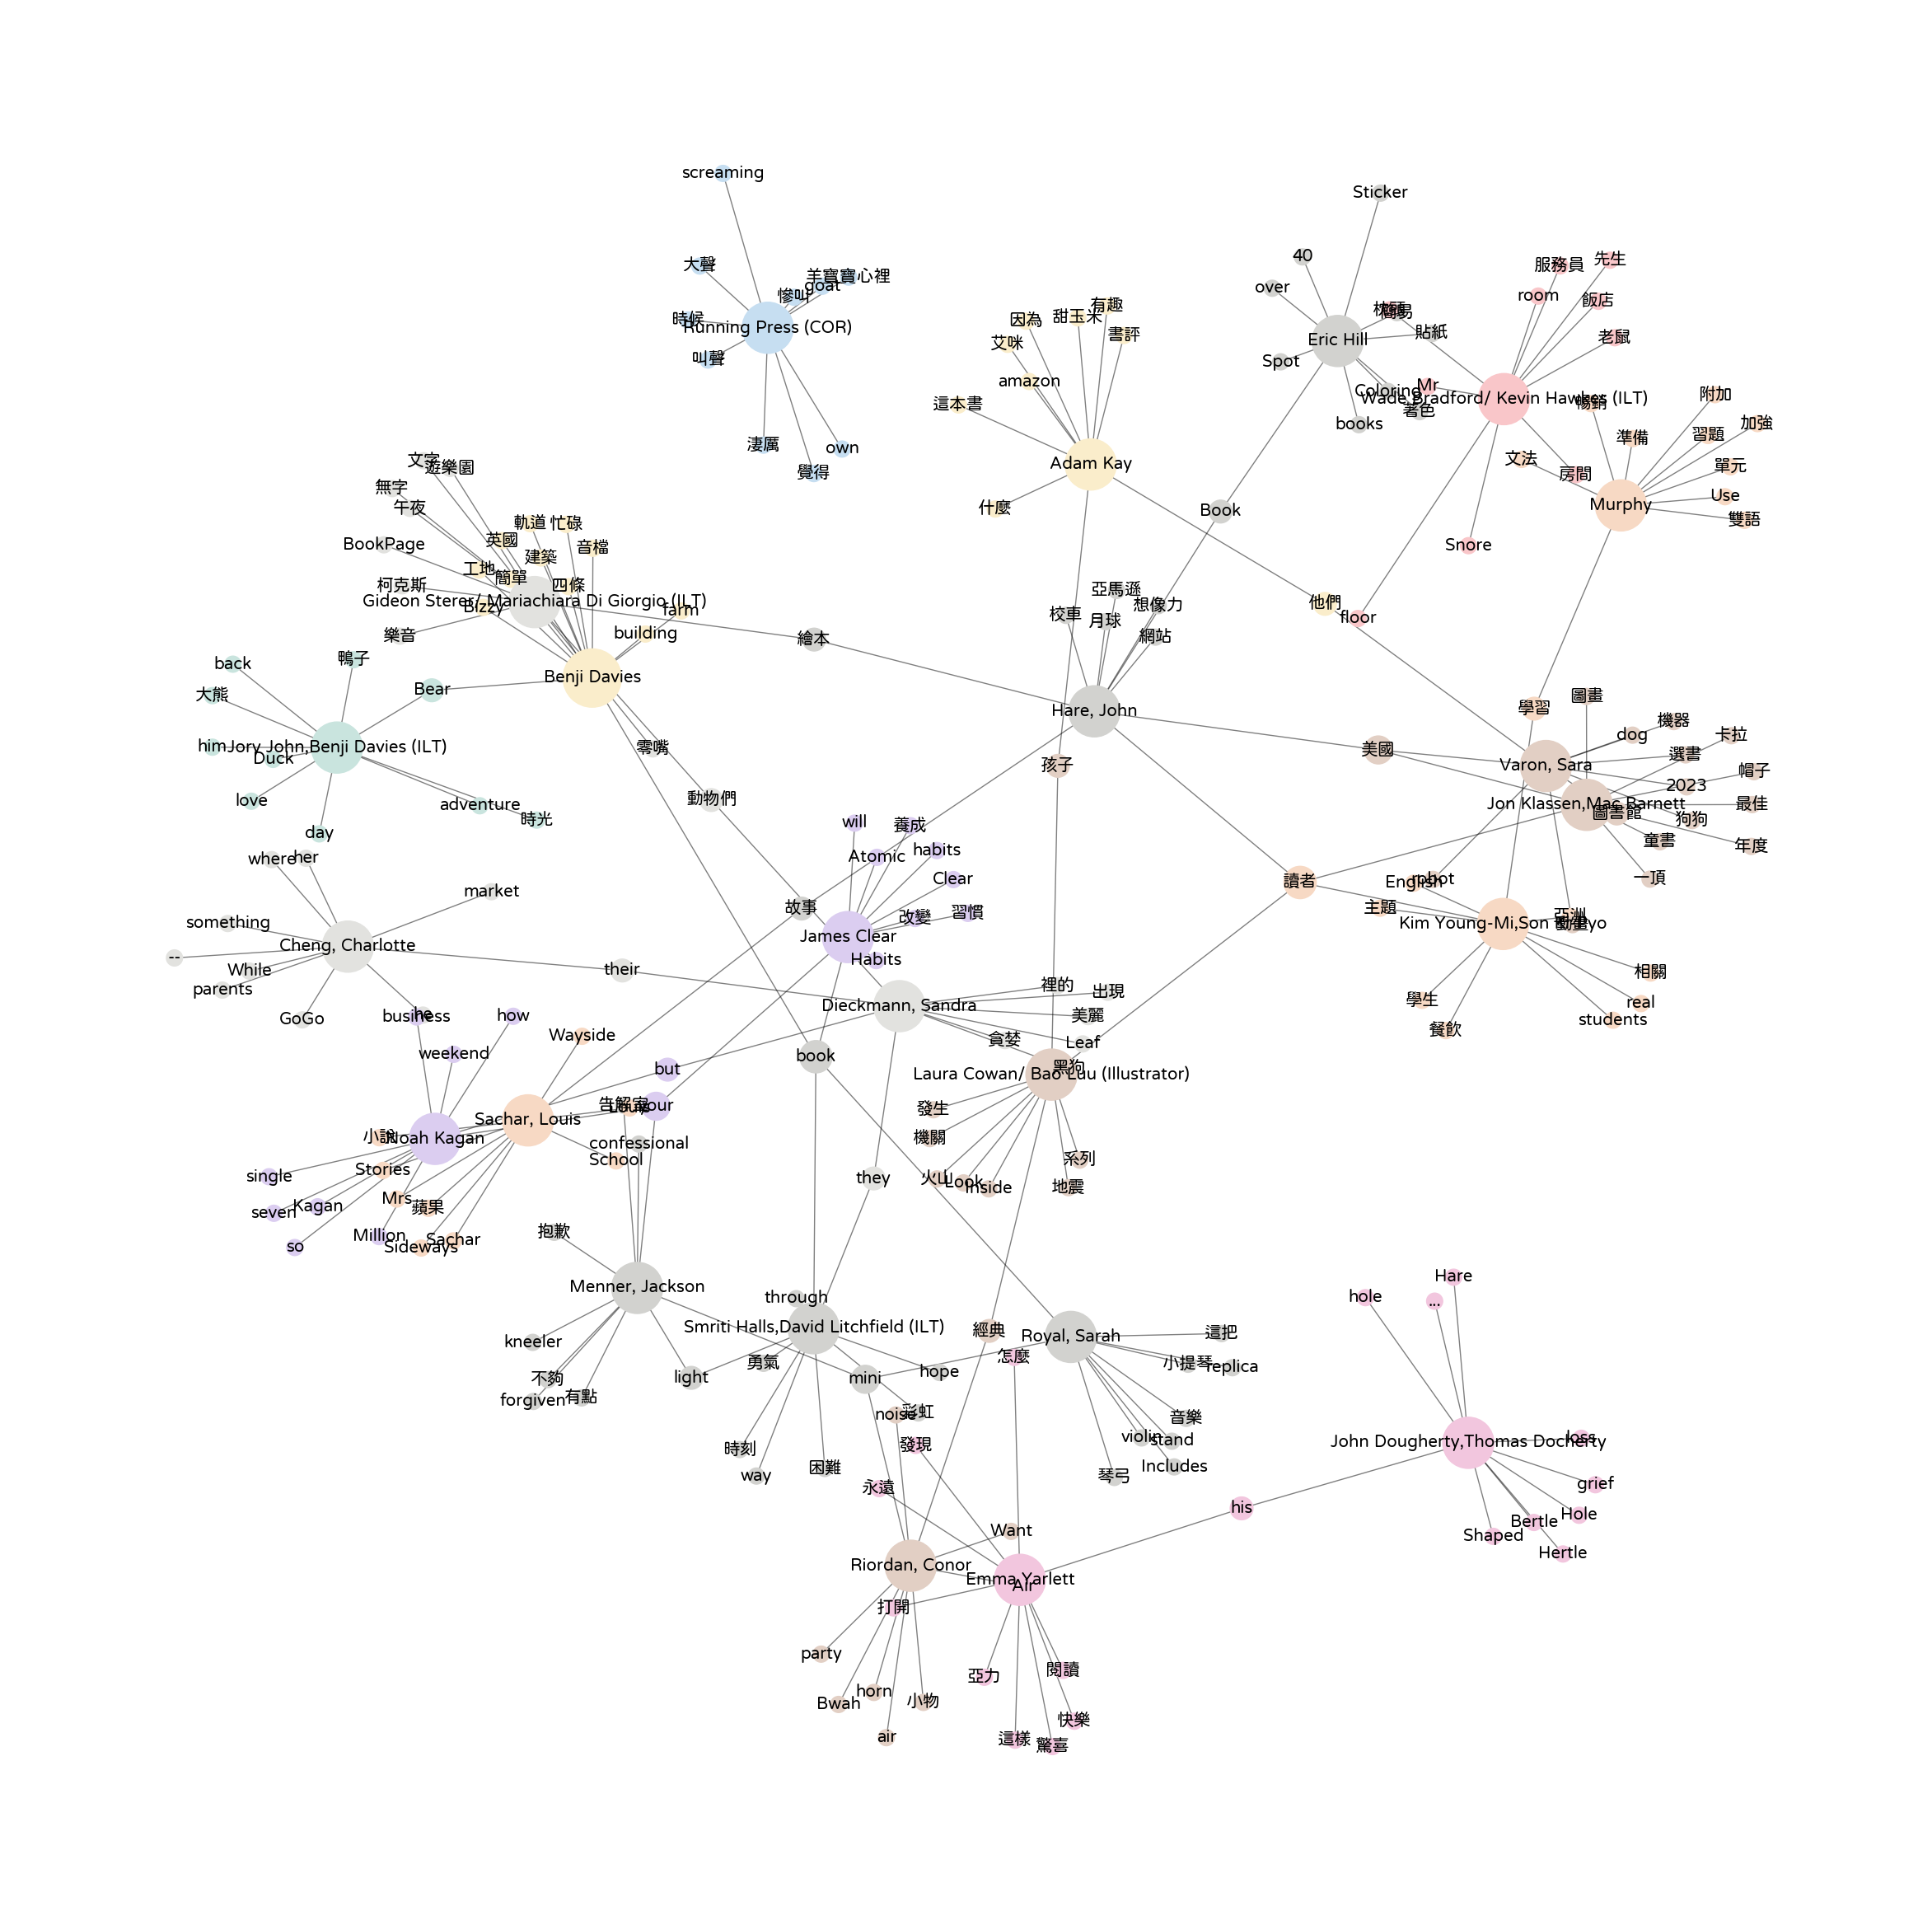

In [7]:
#繪製關聯圖，並使用指定的10種顏色
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet

custom_colors = ["#e2e2df","#d2d2cf","#e2cfc4","#f7d9c4","#faedcb","#c9e4de","#c6def1","#dbcdf0","#f2c6de","#f9c6c9"]
colors_with_alpha = [custom_colors[community_color % len(custom_colors)] for community_color in community_colors]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.25, iterations=85, scale=2)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='jf-openhuninn-2.0')

plt.axis('off')
plt.show()

## 4. 先使用LLM進行摘要，再使用Jieba提取關鍵字後，繪製關聯圖

In [8]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [9]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch
import re

#正則化清理、使用LLM進行摘要
def llm_summarize(raw):

    pattern = re.compile(r'[^\u4e00-\u9fff]')
    text = re.sub(pattern, '', raw)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True).replace(" ", "")
    return summary

In [10]:
#創建一個新欄位summary存放intro資料使用LLM進行摘要後的結果
df['summary'] = df['intro'].apply(llm_summarize)

#創建一個新欄位llm_keywords存放summary資料使用extract_keywords這個functionc所擷取出的關鍵詞
df['llm_keywords'] = df['summary'].apply(extract_keywords)
df.head(10)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected

,title,author,price,link,intro,keywords,summary,llm_keywords
0,迷你桌上型空氣喇叭Mini Air Horn: Get Hype!,"Riordan, Conor",299,https://www.books.com.tw/products/F018494970?l...,「叭──」經典的造型，以及經典到不行的音效，無論是炒熱派對氣氛、打斷同事的鬼打牆、為朋友的冷...,"[horn, Air, air, 經典, 小物, Bwah, party, Want, mi...",叭經典的造型以及經典到不行的音效無論是炒熱派對氣氛打斷同事的鬼打牆為朋友的冷笑話評分任何時刻...,"[電池, 一個, 經典, 小物, usb, 造型, 音效, 無論, 熱派, 氣氛]"
1,迷你桌上型告解室Desktop Confessional,"Menner, Jackson",359,https://www.books.com.tw/products/F017210518?l...,會議當中忍不住對胡扯的大老闆翻白眼；和討人厭客戶握手時，忽然控制不住手勁；目睹豬隊友同事經過...,"[forgiven, your, 抱歉, 有點, 告解室, kneeler, 不夠, lig...",會議當中忍不住對胡扯的大老闆翻白眼和討人厭客戶握手時忽然控制不住手勁目睹豬隊友同事經過茶水間...,"[這組, 抱歉, 會議, 當中, 討人厭, 客戶, 手勁, 豬隊友, 經過, 差點]"
2,滑滑軌道書機關書Bizzy Bear: Find and Follow On the Far...,Benji Davies,220,https://www.books.com.tw/products/F01a447871?l...,★英國超人氣忙碌小熊Bizzy Bear全新滑滑軌道系列★附故事音檔、四條滑滑軌道，讓小小孩...,"[Bizzy, Bear, 軌道, farm, 忙碌, 英國, 音檔, 四條, 簡單, book]",英國超人氣忙碌小熊全新滑滑軌道系列附故事音檔四條滑滑軌道讓小小孩在有趣的農場邊玩邊學英國超人...,"[忙碌, 軌道, 音檔, 農場, 小熊, 超人, 故事, 英國, 滑滑, 四條]"
3,苦海小提琴Tiny Violin: Soundtrack for Your Sob Story,"Royal, Sarah",359,https://www.books.com.tw/products/F019188560?l...,室友第八百次對你抱怨他的另一半，而勸離的話，你已經說到不想再說；同事對你抱怨他僅僅加薪5%，...,"[mini, 小提琴, 琴弓, 這把, 音樂, replica, Includes, vio...",室友第八百次對你抱怨他的另一半而勸離的話你已經說到不想再說同事對你抱怨他僅僅加薪而你的薪水都...,"[這把, ..., 小提琴, 抱怨, 琴弓, 已經, 他僅僅, 沒加, 腦勺, 情況]"
4,Rain Before Rainbows,"Smriti Halls,David Litchfield (ILT)",299,https://www.books.com.tw/products/F017526508?l...,在最黑暗的地方，找到前進的勇氣 雨後的彩虹、烏雲後的陽光、和小女孩和小狐狸一起，讓我們踏上旅...,"[勇氣, 困難, 時刻, book, through, hope, light, way, ...",在最黑暗的地方找到前進的勇氣雨後的彩虹烏雲後的陽光和小女孩和小狐狸一起讓我們踏上旅程過程中會...,"[風景風, 景美, 前進, 勇氣雨, 烏雲後的, 陽光, 我們, 過程, 中會, 困難會]"
5,I Love You Already!,"Jory John,Benji Davies (ILT)",299,https://www.books.com.tw/products/F014305963?l...,★美國亞馬遜網路書店讀者五顆星推薦 活力滿滿、不甘寂寞的鴨子vs. 只想好好靜一靜的無奈大熊...,"[Bear, 大熊, 鴨子, Duck, him, 時光, love, back, adve...",美國亞馬遜網路書店讀者五顆星推薦活力滿滿不甘寂寞的鴨子只想好好靜一靜的無奈大熊爆笑幽默的攻防...,"[愛他, 大熊, 好好, 爆笑, 美國亞馬遜, 網路, 書店, 讀者, 五顆, 推薦]"
6,劍橋活用英語文法套書：初級&中級 (Bilingual Edition),Murphy,624,https://www.books.com.tw/products/F013277793?l...,【暢銷in Use雙語文法套書: 初級&中級】本書的每一單元都由跨版面的兩頁組成，左頁教授一...,"[習題, 文法, Use, 雙語, 單元, 準備, 學習, 加強, 附加, 暢銷]",暢銷雙語文法套書初級中級本書的每一單元都由跨版面的兩頁組成左頁教授一個特定的文法要點右頁則提...,"[試題, 文法, 習題, 暢銷, 雙語, 套書, 初級, 中級, 本書, 單元]"
7,Air Travel and Tourism,"Kim Young-Mi,Son Ki-Pyo",320,https://www.books.com.tw/products/F013560560?l...,專門為亞洲學生設計的旅遊英文，無論是進入業界服務或是規劃自助旅行，皆可從中找到所需情境，包含...,"[相關, 讀者, 學生, students, 亞洲, 餐飲, 主題, 學習, English...",專門為亞洲學生設計的旅遊英文無論是進入業界服務或是規劃自助旅行皆可從中找到所需情境包含訂機票...,"[學生, 英文, 亞洲, 相關, 針對, 課程, 行李, 專門, 設計, 旅遊]"
8,The Midnight Fair,Gideon Sterer/ Mariachiara Di Giorgio (ILT),299,https://www.books.com.tw/products/F018928947?l...,一夜限定的露天遊樂園，無人知曉的魔幻嘉年華！憑藉著想像力，便能將色彩、樂音、氣味滲入心中的動...,"[遊樂園, 動物們, BookPage, 午夜, 柯克斯, 零嘴, 文字, 樂音, 無字, 繪本]",一夜限定的露天遊樂園無人知曉的魔幻嘉年華憑藉著想像力便能將色彩樂音氣味滲入心中的動人無字繪本...,"[遊樂園, 這裡, 將會, 露天, 柯克斯, 無人, 知曉, 嘉年華, 能將, 樂音]"
9,Robot Dreams,"Varon, Sara",399,https://www.books.com.tw/products/F013623648?l...,再見機器人（原著圖文小說）★ 美國《出版人週刊》年度選書★ 紐約公共圖書館年度選書★ 美國圖...,"[機器, 狗狗, 美國, 2023, dog, robot, 選書, 圖書館, 動畫, 他們]",再見機器人原著圖文小說美國出版人週刊年度選書紐約公共圖書館年度選書美國圖書館協會優良童書大獎...,"[動畫獎, 2017, 年度, 美國, 圖書館, 動畫, 最佳, 柯克斯, 影展, 再見]"


In [11]:
#選取排行榜前25名製作關聯圖，使用作者當作母節點、關鍵字擔任子節點
G = nx.Graph()

for index, row in df.head(25).iterrows():
    author = row['author']
    keywords = row['keywords']

    G.add_node(author, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword)

In [12]:
#使用justfont的粉圓字
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('jf-openhuninn-2.0.ttf')
mpl.rc('font', family='jf-openhuninn-2.0')

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


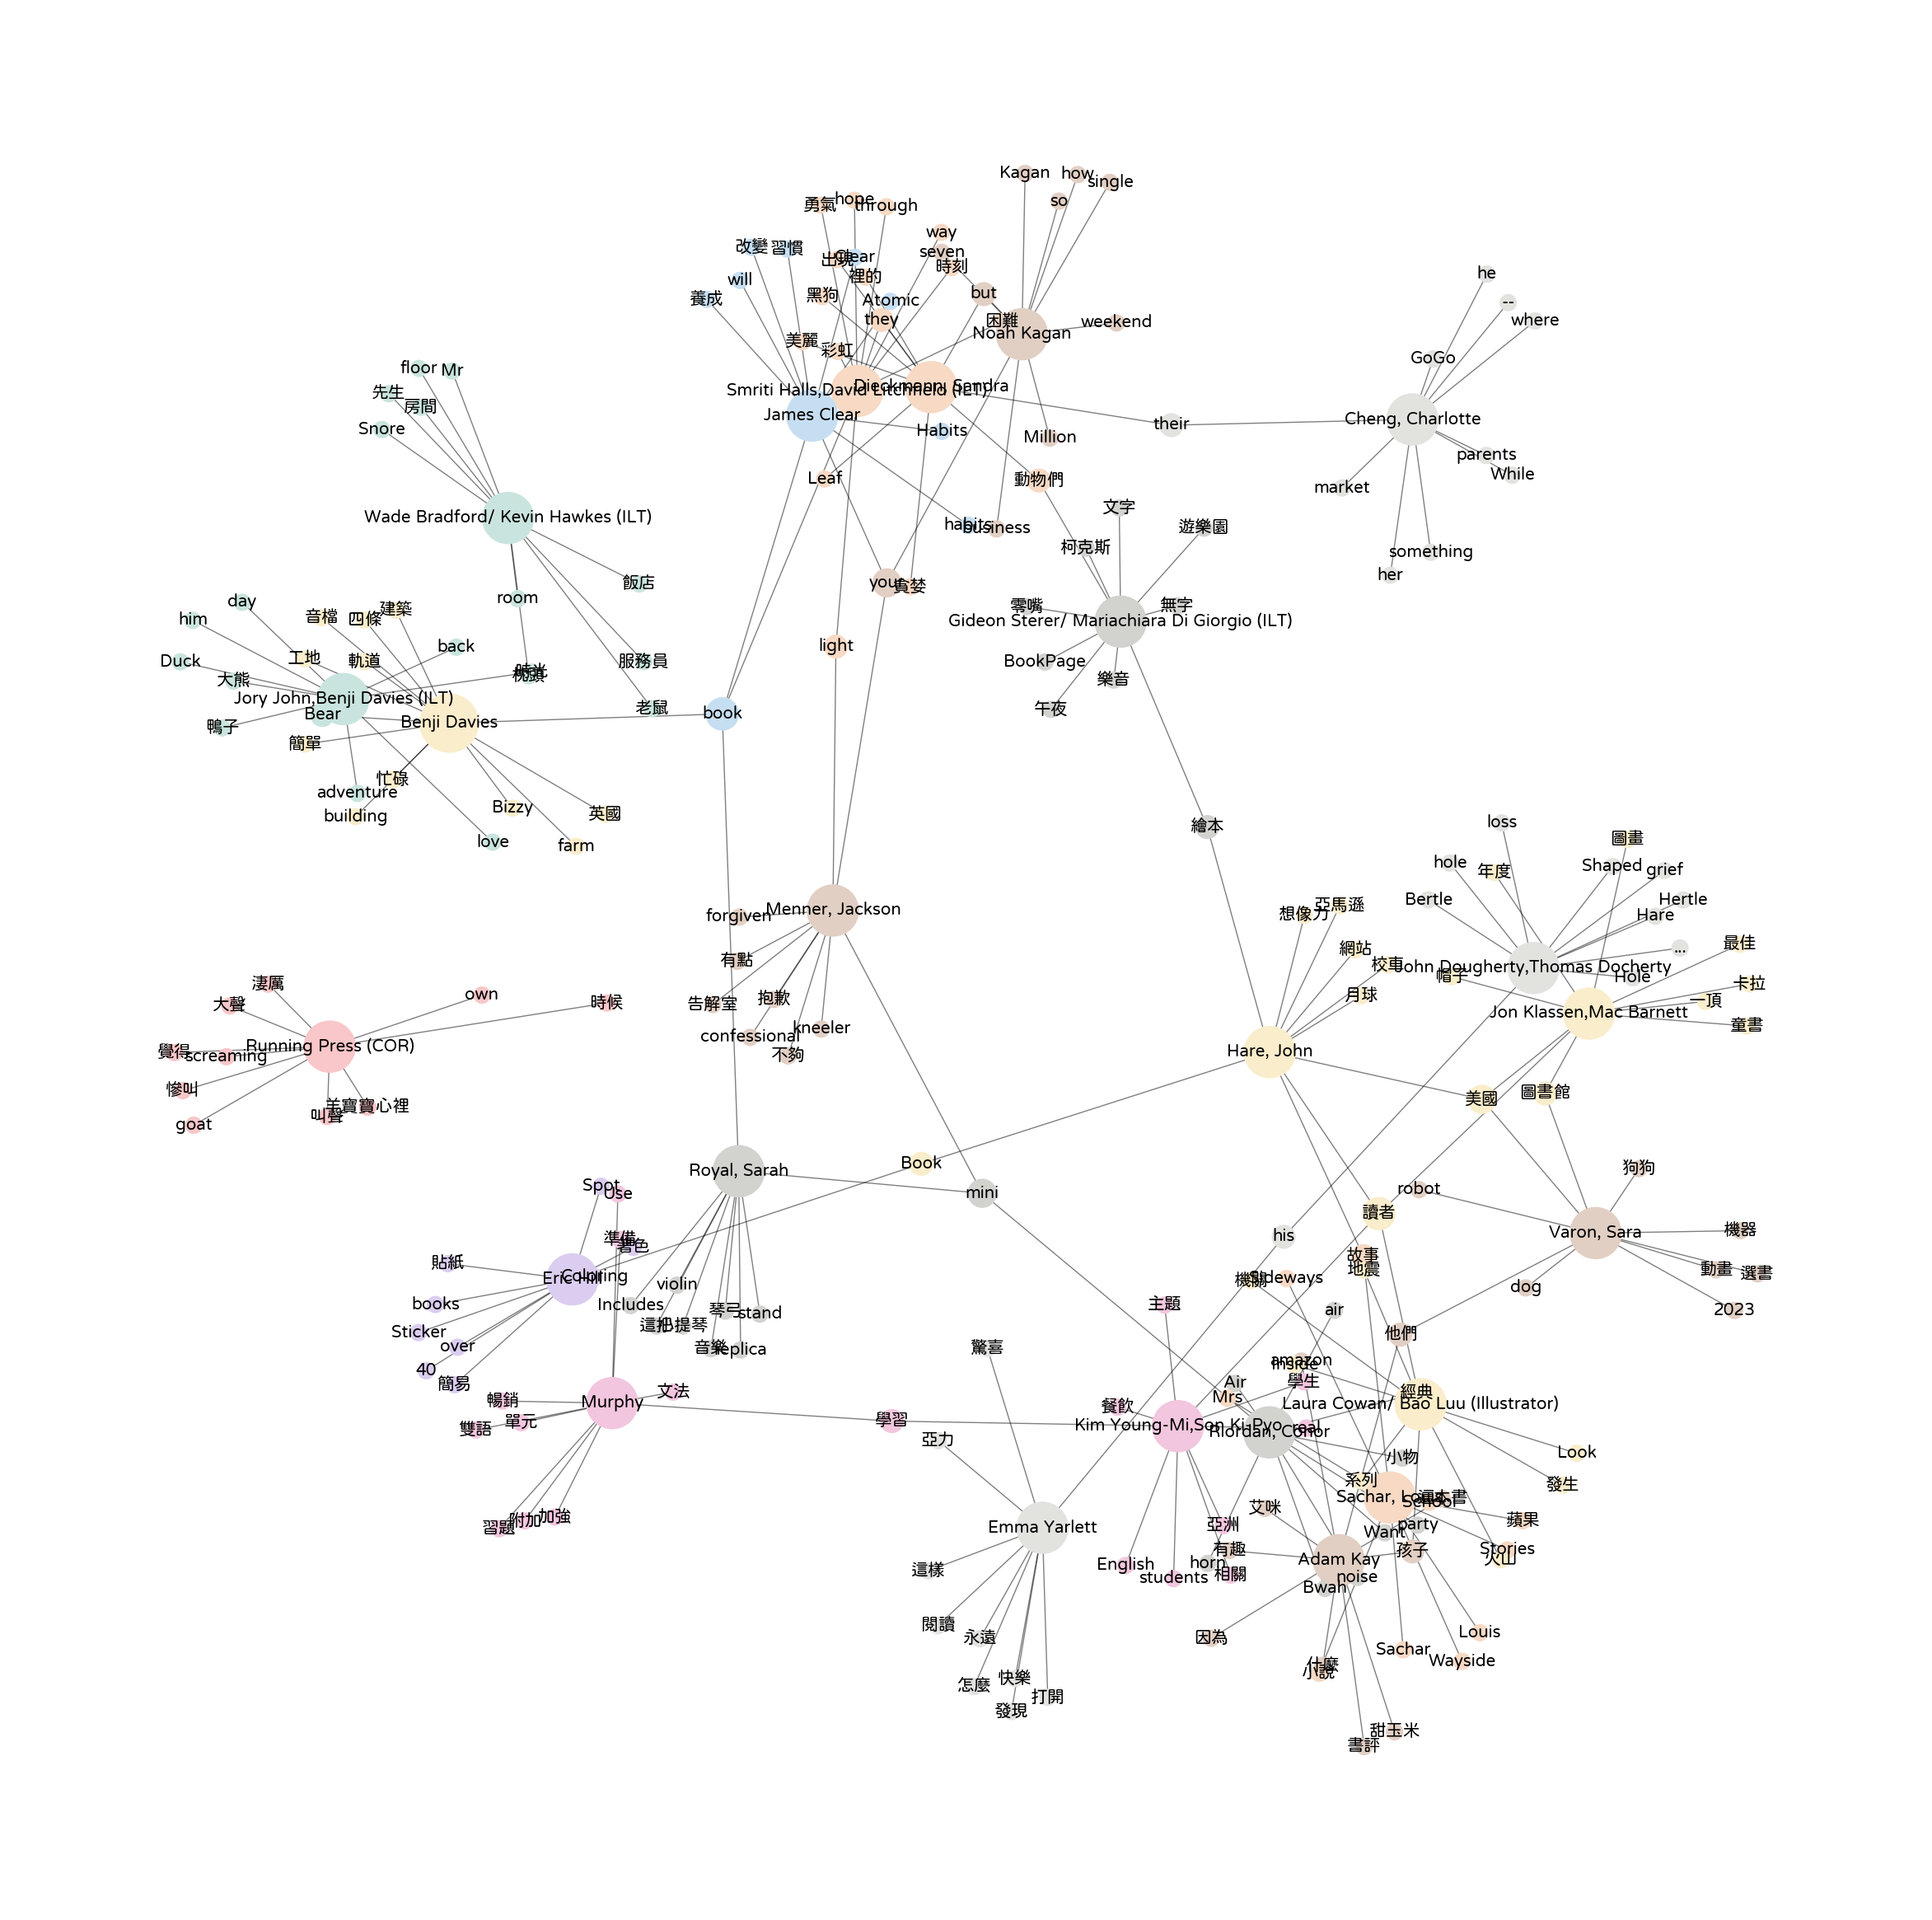

In [13]:
#繪製關聯圖，並使用指定的10種顏色
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet

custom_colors = ["#e2e2df","#d2d2cf","#e2cfc4","#f7d9c4","#faedcb","#c9e4de","#c6def1","#dbcdf0","#f2c6de","#f9c6c9"]
colors_with_alpha = [custom_colors[community_color % len(custom_colors)] for community_color in community_colors]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.25, iterations=85, scale=2)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='jf-openhuninn-2.0')

plt.axis('off')
plt.show()

# 5. 套用Gradio，建立排行榜爬蟲選項介面

In [1]:
import BookCrawler_Gradio as bcg

In [ ]:
crawler = bcg.BookTopSalesCrawler()
crawler.launch()

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://9be77f086d0e12b0ad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4p/wgl8n9h55p3g6ld2z3r4jn5m0000gn/T/jieba.cache
Loading model cost 0.885 seconds.
Prefix dict has been built successfully.
